In [22]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [23]:
# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)

# Combine the data into a single dataset
merged = city_df.merge(ride_df, on='city', how = 'left')

# Display the data table for preview
merged.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

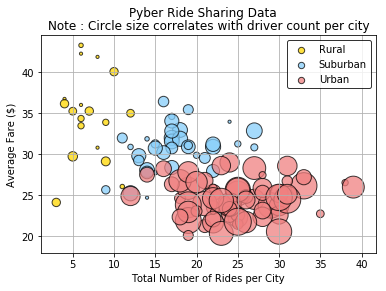

In [24]:
city_grpby = merged.groupby('city')
avg_fare = city_grpby['fare'].mean()
ride_count = city_grpby['ride_id'].count()
driver_count = city_grpby['driver_count'].mean()
city_type = city_grpby['type'].max()

city_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type })

rural = city_info[city_info['Type of City'] == 'Rural']
suburban = city_info[city_info['Type of City'] == 'Suburban']
urban = city_info[city_info['Type of City'] == 'Urban']

plt.suptitle('Pyber Ride Sharing Data')

city_color = {'Urban': '#F08080', 'Suburban': '#87CEFA', 'Rural': '#FFD700'}
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)

plt.title('Note : Circle size correlates with driver count per city')
plt.xlabel('Total Number of Rides per City')
plt.ylabel('Average Fare ($)')
plt.grid()

lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]

## Total Fares by City Type

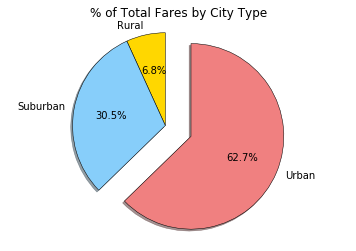

In [25]:
# % of Total Fares by City Type

by_type = merged.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

fares = by_type.sum()['fare']

labels = fare_sum.index

colors = [city_color[n] for n in labels]
explode = [0 , 0, .3]
plt.pie(fare_sum, startangle = 90, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()

## Total Rides by City Type

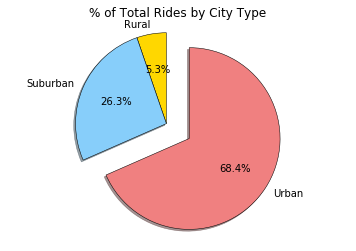

In [26]:
# number of ride per city type
 
ride_sum = by_type.count()['ride_id']

labels = ride_sum.index
plt.pie(ride_sum, startangle = 90, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()

## Total Drivers by City Type

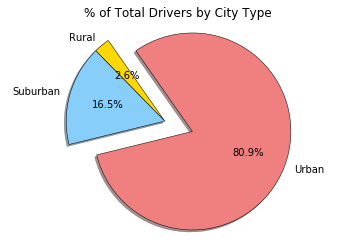

In [27]:
# of driver per city type

driver_sum = city_df.groupby('type').sum()['driver_count']

labels = driver_sum.index
plt.pie(driver_sum, startangle = 125, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()

# Analysis
* Rural Areas had less drivers and riders, but no well defined trend in relationship to average fare. This could possibly be explained by population density of rural areas versus urban areas. Drivers in rural areas only make up 2.6% of the total drivers while rural areas account for approximately 6% of total fares and rides. We also see data points for rural average fare well above what is experienced in the city probably due to a higher average distance between points of interest in rural areas.
* The number of drivers seems to increase with city classification with rural areas having the least amount of drivers per city and urban areas having more. There are, however, data points for urban areas that have similar number of drivers. 
* There seems to be a negative relationship between the number of rides and the average fare. This is more well defined for the suburban and urban city classifications. This might the average distance a rider is travelling in these cities. Average travel distance would be a good dataset to analyize further. However, cities make up for 63% and 68% of total fare and rides respectively, but the number of drivers in the city is 86.2% of the total drivers. It is possible that there is an over supply of drivers in these cities causing lower prices. A similar, but less dramatic trend is seen with suburban areas. It would be beneficial to see the data on surge pricing to see how the supply of drivers effects average fare.